In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [5]:
df = pd.read_csv("Dataset/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


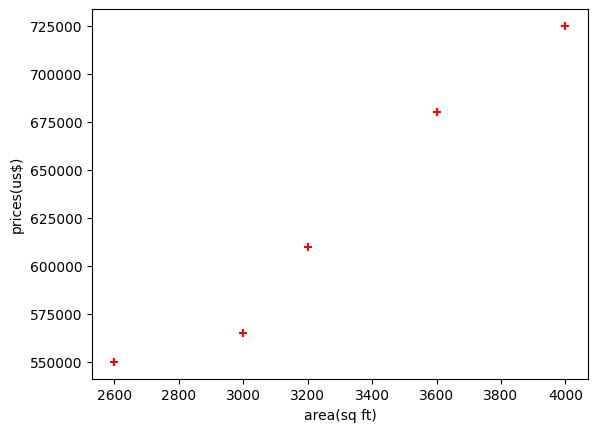

In [6]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('prices(us$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)


LinearRegression()

In [8]:
reg.predict([[3300],[5000]])

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466, 859554.79452055])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

In [11]:
y=135.78767123*3300+180616.43835616432
y

628715.7534151643

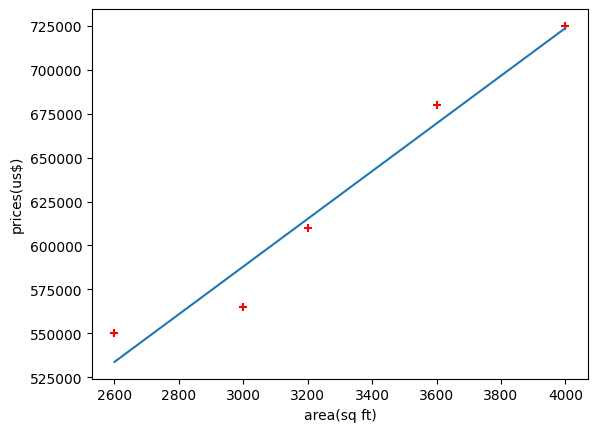

In [12]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('prices(us$)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]))

In [13]:
#Linear Regression with multiple variables

In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [15]:
df= pd.read_csv('Dataset/homeprices1.csv')

In [16]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [17]:
import math
median_bedrooms=math.floor(df.bedrooms.median())

In [18]:
median_bedrooms

4

In [19]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

In [20]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [21]:
model = linear_model.LinearRegression()
df.price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [22]:
model.fit(df[['area','bedrooms', 'age']], df.price)

LinearRegression()

In [23]:
model.predict([[3000,3,40]])

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [24]:
#one hot encoding

In [25]:
df_en = pd.read_csv("Dataset/homeprices2.csv")
df_en

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [26]:
dummies=pd.get_dummies(df_en.town)*1
dummies


,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [27]:
merged = pd.concat([df_en,dummies], axis='columns')

In [28]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [29]:
final =merged.drop(['town','west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [30]:
model_en=linear_model.LinearRegression()
model_en.fit(final[['area','monroe township','robinsville']], final.price)

LinearRegression()

In [31]:
model_en.predict([[3200, 0,1]])

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([641534.61621157])

In [32]:
#Performing the above step using one hot encoder from sklearn 
#intead of get_dummies

In [33]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [34]:
dfle = df_en
df_en
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [35]:
df_en

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [36]:
X= df_en[['town','area']]

In [37]:
Y=df_en.price

In [38]:
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=[0]
ohe=ColumnTransformer(transformers =[('onehot', OneHotEncoder(), categorical_features)], remainder ='passthrough')

In [40]:
X=ohe.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [41]:
X=X[:,1:]
X


array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [42]:
md_en=linear_model.LinearRegression()
md_en.fit(X,Y)
md_en.predict([[1,0,2800]])

array([590775.63964739])

In [43]:
#Logistic regression Multiclass


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [45]:
digits= load_digits()

In [46]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [47]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

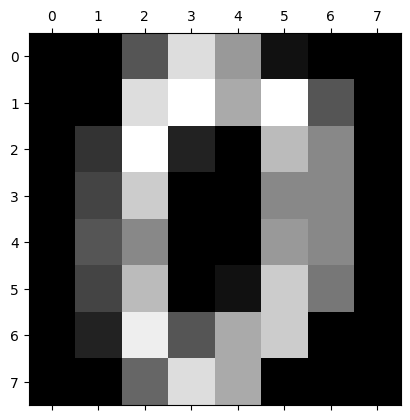

In [48]:
plt.gray()
plt.matshow(digits.images[0])

In [49]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split( digits.data, digits.target, test_size=0.33)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
mdlogreg= LogisticRegression()

In [54]:
mdlogreg.fit(X_train,y_train)

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
mdlogreg.score(X_test,y_test)

0.9713804713804713

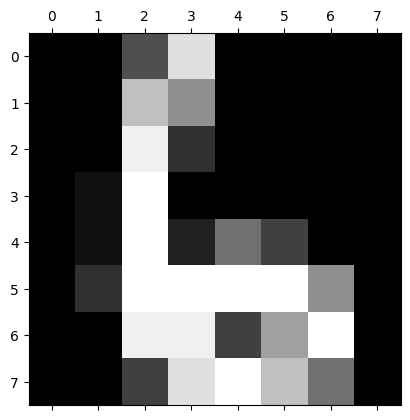

In [56]:
plt.matshow(digits.images[67])

In [57]:
mdlogreg.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [58]:
from sklearn.metrics import confusion_matrix
y_predicted= mdlogreg.predict(X_test)
cm= confusion_matrix(y_test,y_predicted)


In [59]:
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 63,  0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 62,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 57,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  4,  0,  0,  0,  2,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 51]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

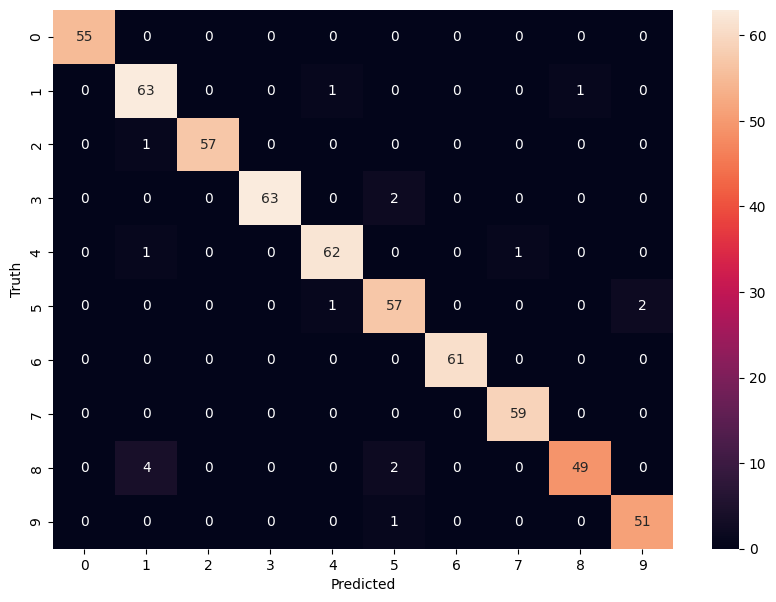

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
#Decision Tree

In [62]:
import pandas as pd

In [63]:
df= pd.read_csv('Dataset/salaries.csv')

In [64]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [65]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target=df['salary_more_then_100k']

In [66]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [67]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le_company= LabelEncoder()
le_job= LabelEncoder()
le_degree= LabelEncoder()

In [70]:
inputs['company_n']=le_company.fit_transform(inputs['company'])

In [71]:
inputs['job_n']=le_company.fit_transform(inputs['job'])

inputs['degree_n']=le_company.fit_transform(inputs['degree'])

In [72]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [73]:
inputs_n=inputs.drop(['company','job','degree'], axis='columns')

In [74]:
inputs_n.head()


,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [75]:
from sklearn import tree

In [76]:
model= tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [77]:
#ideally we should use train test split before training. for simplicity we are not spliting


In [78]:
model.predict([[2,2,1]])

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [79]:
#SVM: suppport Vector Machine

In [80]:
import pandas as pd

In [81]:
from sklearn.datasets import load_iris

In [82]:
iris=load_iris()

In [83]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [84]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [85]:
type(iris.data)

numpy.ndarray

In [86]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [87]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [88]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
df['target']=iris.target

In [90]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
df['flower_names']= df.target.apply(lambda x: iris.target_names[x])

In [92]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [93]:
from matplotlib import pyplot as plt

In [94]:
%matplotlib inline

In [95]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [96]:
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Text(0, 0.5, 'sepal width')

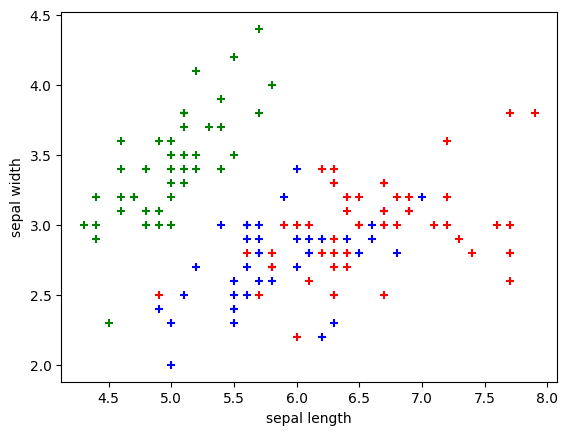

In [97]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'] , color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'] , color='blue', marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'] , color='red', marker='+')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

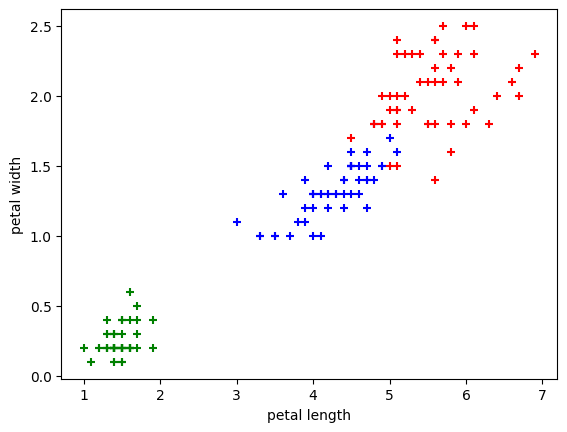

In [98]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'] , color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'] , color='blue', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'] , color='red', marker='+')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X=df.drop(['target','flower_names'],axis='columns')

In [101]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
y=df[['target','flower_names']]

In [103]:
y=y.drop(['flower_names'], axis='columns')

In [104]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [105]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [106]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [107]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [108]:
from sklearn.svm import SVC

In [109]:
model= SVC()

In [110]:
model.fit(X_train,y_train)

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [111]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [112]:
model.score(X_test,y_test)

1.0

In [113]:
y_test

,target
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [114]:
#Random Forest

In [115]:
import pandas as pd
from sklearn.datasets import load_digits

In [116]:
data=load_digits()

In [117]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

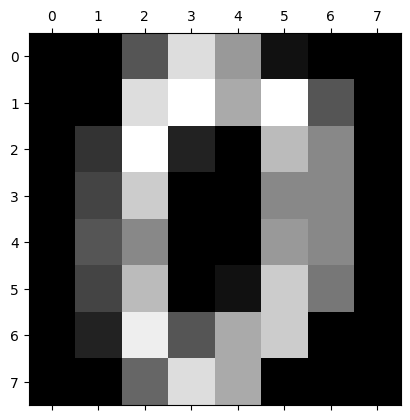

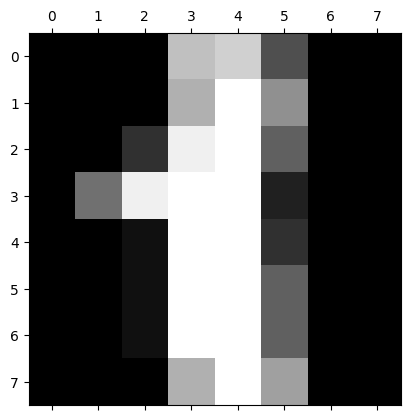

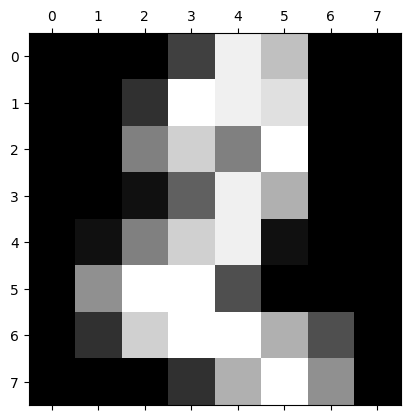

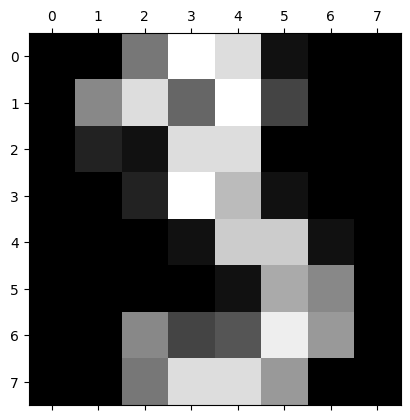

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [119]:
df = pd.DataFrame(digits.data)

In [120]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [121]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [122]:
df['target']=digits.target

In [123]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 df.drop(['target'],axis='columns'), df.target, test_size=0.2)

In [125]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
328,0.0,0.0,5.0,8.0,11.0,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,13.0,2.0,0.0,0.0
239,0.0,0.0,0.0,0.0,15.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,15.0,5.0,0.0,0.0
984,0.0,0.0,1.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,2.0,12.0,16.0,15.0,5.0,0.0
1409,0.0,0.0,2.0,15.0,15.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,2.0,15.0,10.0,0.0,0.0,0.0
97,0.0,0.0,0.0,3.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,0.0,0.0,2.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,...,16.0,7.0,0.0,0.0,2.0,14.0,16.0,15.0,8.0,0.0
576,0.0,0.0,4.0,12.0,16.0,14.0,7.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,3.0,12.0,16.0,15.0,2.0,0.0
617,0.0,0.0,4.0,13.0,14.0,8.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,5.0,16.0,14.0,1.0,0.0,0.0
1372,0.0,0.0,1.0,14.0,14.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,14.0,16.0,11.0,0.0,0.0


In [126]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=40)


In [127]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [128]:
model.score(X_test,y_test)

0.9777777777777777

In [129]:
y_predicted=model.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

In [131]:
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

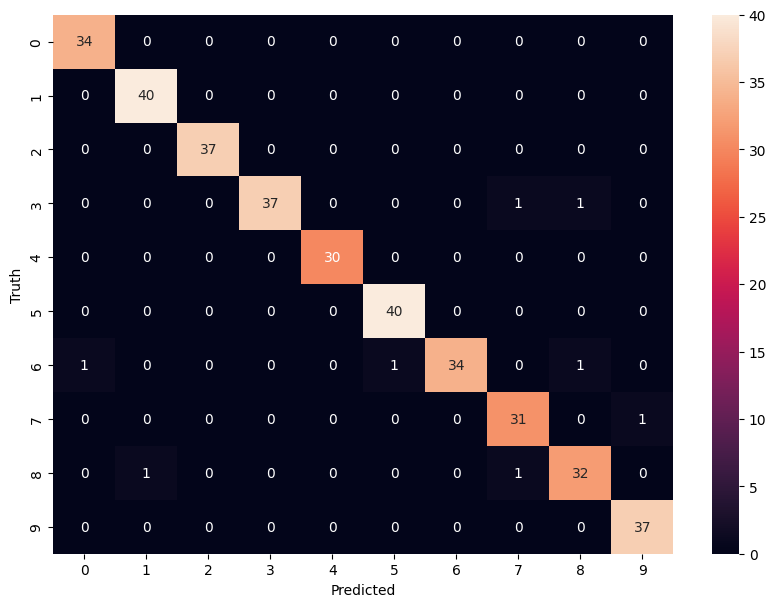

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [133]:
# K Fold cross validation

In [134]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
digits= load_digits()

In [135]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(digits.data,digits.target,test_size=0.3)

In [137]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9611111111111111

In [138]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9814814814814815

In [139]:
rf= RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9611111111111111

In [140]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [141]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [142]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)


In [143]:
from sklearn.model_selection import StratifiedKFold

In [144]:
folds= StratifiedKFold(n_splits=3)

In [145]:
scores_l=[]
scores_svm=[]
scores_rf=[]

for train_index, test_index in kf.split(digits.data):
    X_train,X_test, y_train,y_test = digits.data[train_index],digits.data[test_index],digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [146]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [147]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [148]:
scores_rf

[0.9332220367278798, 0.9599332220367279, 0.9248747913188647]

In [149]:
from sklearn.model_selection import cross_val_score


In [150]:
cross_val_score(LogisticRegression(),digits.data,digits.target)

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [151]:
# K-means clustering

In [152]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [153]:
df= pd.read_csv("Dataset/income.csv")

In [154]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


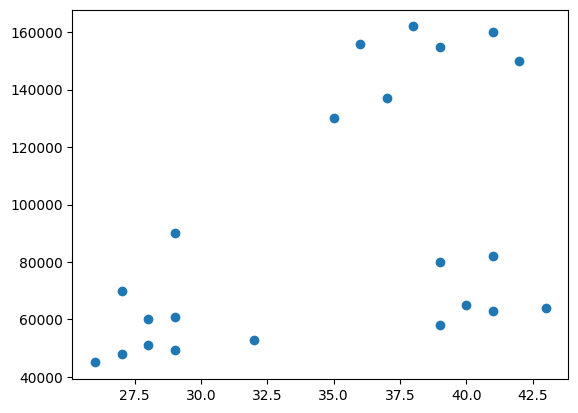

In [155]:
plt.scatter(df.Age,df['Income($)'])

In [156]:
km= KMeans(n_clusters=3)

In [157]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [158]:

type(df.Age)

pandas.core.series.Series

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [160]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

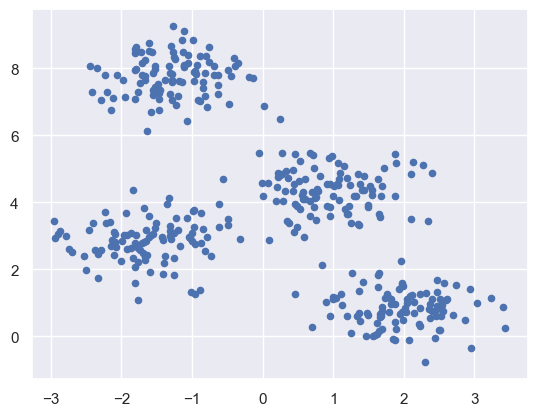

In [161]:
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.show()

In [162]:
kmeans = KMeans(n_clusters=4)


In [408]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [409]:
# Naive Bayes: Predicting titanic survival
# it is based on Bayes Theorem
#it is called Naive because the assumtption is that
#the features are indipendent of each other but in reality thats not the case obviiouslyu

In [410]:
import pandas as pd
from sklearn import linear_model

In [425]:
df= pd.read_csv("Dataset/titanic.csv")

In [426]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [427]:
#some of the features are irrelevant for the survival rate such as name, id,etc.
# we will drop them

In [428]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)


In [429]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [440]:
df_target=df.Survived
inputs=df.drop(['Survived'], axis='columns')
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [441]:
df_target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [442]:
dummies=pd.get_dummies(inputs.Sex)*1

In [443]:
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [445]:
inputs= pd.concat([inputs, dummies], axis='columns')

In [446]:
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [448]:
inputs.drop('Sex', axis='columns', inplace= True)

In [449]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [450]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [454]:
inputs.head(7)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1


In [453]:
inputs.Age.fillna(inputs.Age.mean(), inplace=True)

In [455]:
from sklearn.model_selection import train_test_split

In [458]:
X_train,X_test,y_train,y_test =train_test_split(inputs,df_target,test_size=0.2)

In [459]:
X_train

,Pclass,Age,Fare,female,male
661,3,40.000000,7.2250,0,1
859,3,29.699118,7.2292,0,1
159,3,29.699118,69.5500,0,1
854,2,44.000000,26.0000,1,0
616,3,34.000000,14.4000,0,1
...,...,...,...,...,...
322,2,30.000000,12.3500,1,0
318,1,31.000000,164.8667,1,0
245,1,44.000000,90.0000,0,1
44,3,19.000000,7.8792,1,0


In [460]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [466]:
y_predicted=model.predict(X_test[:10])

In [467]:
y_predicted

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [468]:
y_test[:10]

811    0
845    0
100    0
494    0
83     0
205    0
646    0
680    0
538    0
94     0
Name: Survived, dtype: int64

In [470]:
model.score(X_test,y_test)

0.7988826815642458

In [471]:
import pandas as pd

In [472]:
df=pd.read_csv('Dataset/spam.csv')

In [476]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [477]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [479]:
df['spam']=df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [480]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [481]:
from sklearn.model_selection import train_test_split

In [482]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25)

In [483]:
#count vectorizer technique to convert text into number

In [484]:
from sklearn.feature_extraction.text import CountVectorizer
v =CountVectorizer()
X_train_count =v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [485]:
X_train_count

<4179x7399 sparse matrix of type '<class 'numpy.int64'>'
	with 55373 stored elements in Compressed Sparse Row format>

In [486]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [487]:
emails= [" Hey Mohan can we get together to watch football game tomorrow", "Upto 20% discount, exclusive offer just for you. Dont Miss!"]

In [488]:
email_count = v.transform(emails)

In [489]:
model.predict(email_count)

array([0, 1], dtype=int64)

In [490]:
X_test_count = v.transform(X_test)
model.score(X_test_count,y_test)

0.9877961234745154

In [491]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),('nb', MultinomialNB())
])

In [493]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [495]:
clf.score(X_test,y_test)

0.9877961234745154

In [496]:
#Hyper parameter tuning:grid search cv

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
df=load_iris()


In [3]:
data=pd.DataFrame(df.data, columns=df.feature_names)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data['Flower']=df.target

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data['Flower']=data['Flower'].apply(lambda x:df.target_names[x])

In [8]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(df.data, df.target, test_size= 0.3)

In [11]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=30, gamma = 'auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [12]:
model = SVC(kernel='rbf', C=30, gamma = 'auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cross_val_score(SVC(kernel='linear', C=11, gamma='auto'), df.data, df.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [15]:
cross_val_score(SVC(kernel='linear', C=10, gamma='auto'), df.data, df.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [16]:
cross_val_score(SVC(kernel='rbf', C=20, gamma='auto'),df.data, df.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [20]:
import numpy as np
kernel=['linear','rbf']
c=[1,10,20]
avg_score={}
for kval in kernel:
    for cval in c:
        cv_scores=cross_val_score(SVC(kernel=kval,C=cval, gamma='auto'), df.data,df.target, cv=5)
        avg_score[kval + '_'+str(cval)]= np.average(cv_scores)

avg_score       
        
        
        

{'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668}

In [25]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'),{
    'kernel':['linear','rbf'],
    'C':[1,10,20]
}, cv=5, return_train_score= False)

clf.fit(df.data, df.target)
clf.cv_results_

{'mean_fit_time': array([0.00100622, 0.00159616, 0.00109878, 0.00125899, 0.00118742,
        0.00157266]),
 'std_fit_time': array([0.00063121, 0.00048781, 0.00020413, 0.00038605, 0.00039164,
        0.00098709]),
 'mean_score_time': array([0.00080156, 0.00308757, 0.00040431, 0.00200119, 0.00130243,
        0.00218925]),
 'std_score_time': array([0.00051064, 0.00062682, 0.00049525, 0.0003158 , 0.00039669,
        0.00073559]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'}],


In [26]:
df =pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001006,0.000631,0.000802,0.000511,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001596,0.000488,0.003088,0.000627,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001099,0.000204,0.000404,0.000495,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
3,0.001259,0.000386,0.002001,0.000316,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.001187,0.000392,0.001302,0.000397,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6
5,0.001573,0.000987,0.002189,0.000736,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [27]:
clf.best_params_


{'C': 1, 'kernel': 'linear'}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rs= RandomizedSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel': ['linear','rbf']
},cv=5,
    return_train_score= False,
                      n_iter=2)



In [34]:
c_space=np.logspace(-5,8,15)
param_grid = { 'C' : c_space}
param_grid

{'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
        5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
        2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
        1.38949549e+06, 1.17876863e+07, 1.00000000e+08])}

In [35]:
#L1 and l2 regularization| Lasso, Ridge Regression

In [163]:
#Principal component Analysis


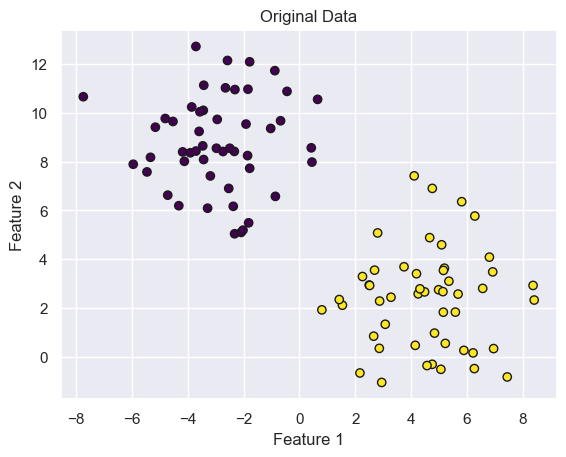

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Create a synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2.0)

# Visualize the original data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


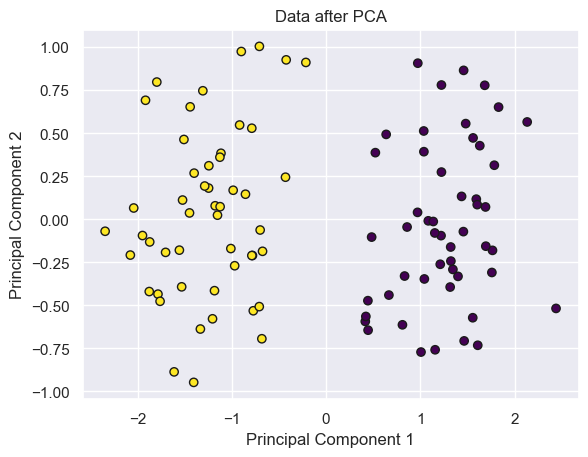

In [171]:
# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA with two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize the data in the reduced-dimensional space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Data after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [172]:
print(X[0])
print(X_pca[0])

[-3.4675461   8.64296817]
[ 1.32205055 -0.16119437]
